In [ ]:
# check latitude / longitude of all missions
# fing zigzags to verify direction-dependency


In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import pandas as pd
import matplotlib.animation as animation
import numpy as np
from scipy.interpolate import griddata
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import os
import matplotlib.dates as mdates
import matplotlib as mpl
import re
from itertools import chain
import matplotlib
import matplotlib.ticker as ticker
import scipy.io
from statsmodels.nonparametric.smoothers_lowess import lowess
import gsw
from scipy.stats import pearsonr
from matplotlib.pyplot import cm
from cartopy import config
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotx
from cycler import cycler
from matplotlib.dates import date2num
import cartopy.feature as cfeature  #adding features in the map
#import gpxpy
import xml.etree.ElementTree as ET
import plotly.graph_objs as go

In [36]:
#read data and rename cols
os.chdir('C:/Users/piago/Documents/Uni/5_Semester/Hiwi')
csv_file = "C:/Users/piago/Documents/Uni/5_Semester/Hiwi/Data/HE614_All_Grids_Single_Sheet.xlsx"

# Read the Excel file
df = pd.read_excel(csv_file, skiprows=10)
df = df.set_index('Date_Time')
df.index = pd.to_datetime(df.index)
df.rename(columns={'CTD_Temperature_SML' : 'CTD_Temp_SML',
                   'CTD_Temperature_30cm' : 'CTD_Temperature_30cm_[°C]',
                   'CTD_Temperature_40cm' : 'CTD_Temperature_40cm_[°C]',
                   'CTD_Temperature_85cm' : 'CTD_Temperature_85cm_[°C]',
                   'CTD_Temperature_100cm' : 'CTD_Temperature_100cm_[°C]'}, inplace= True)

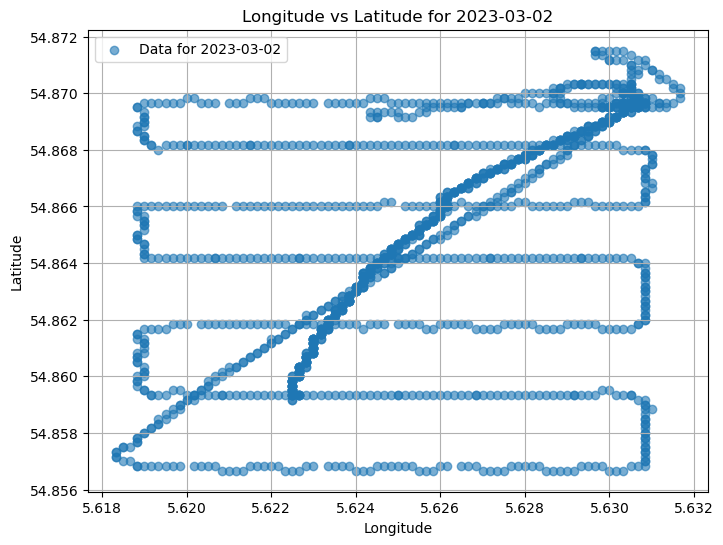

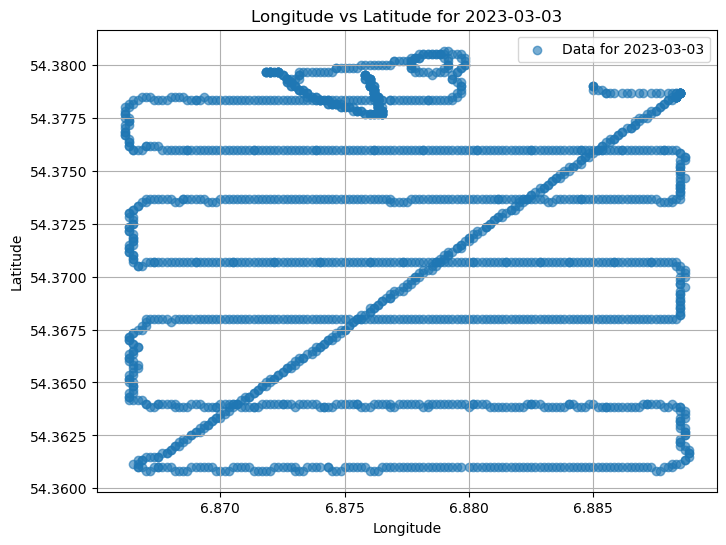

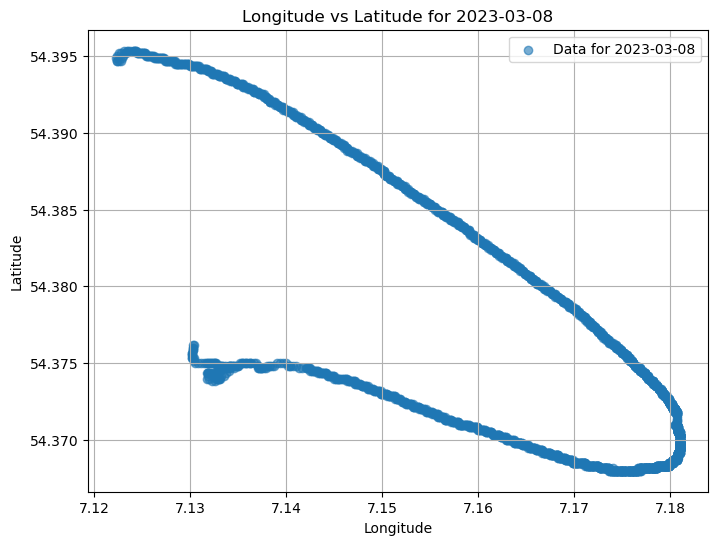

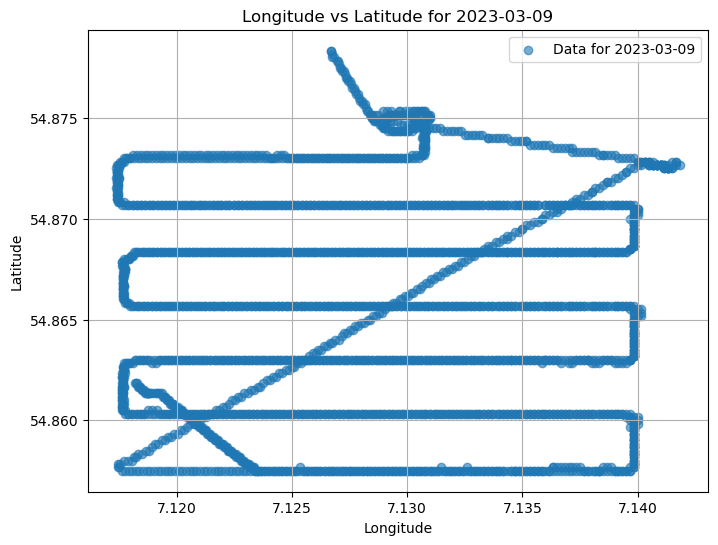

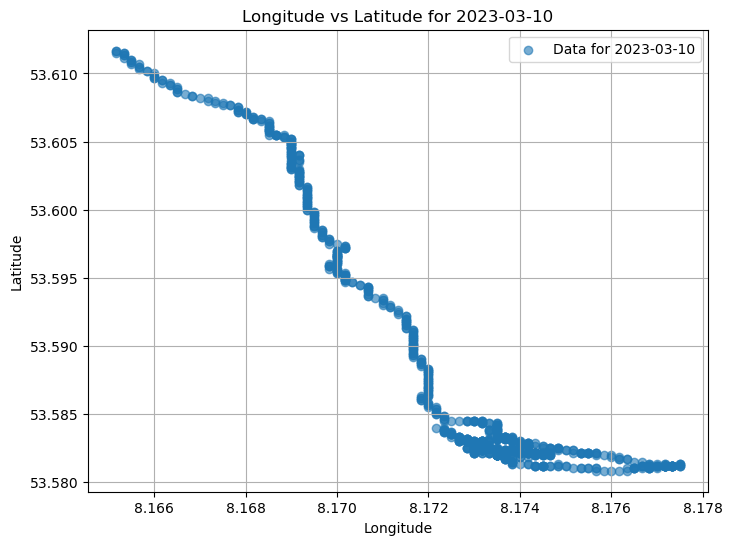

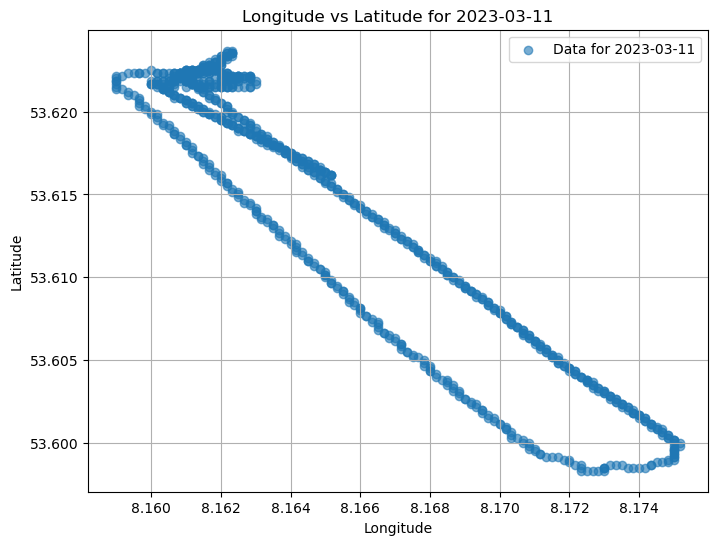

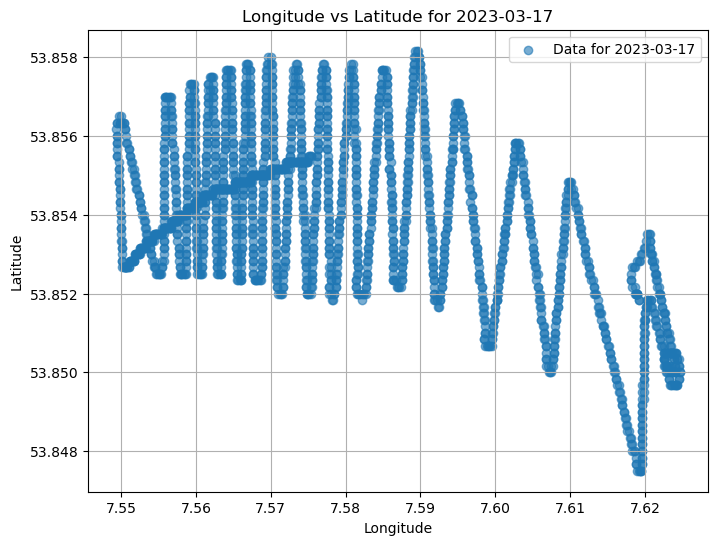

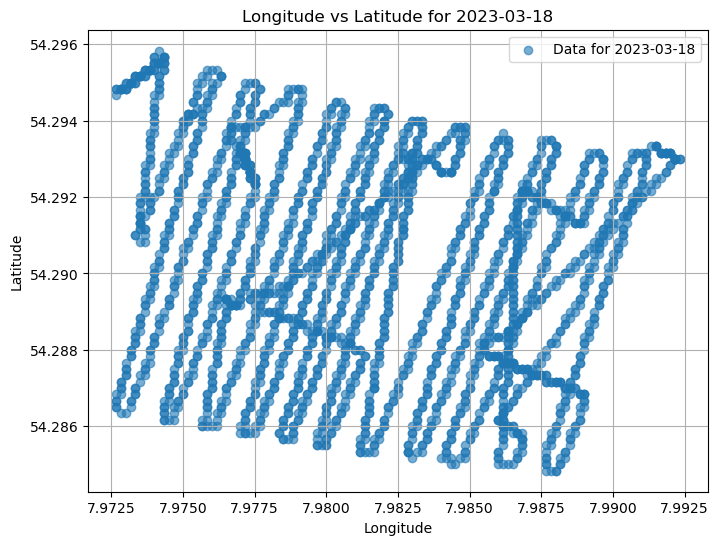

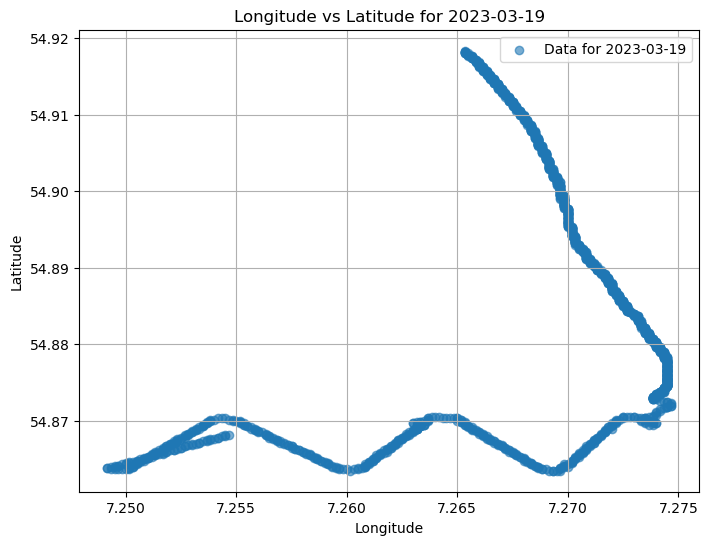

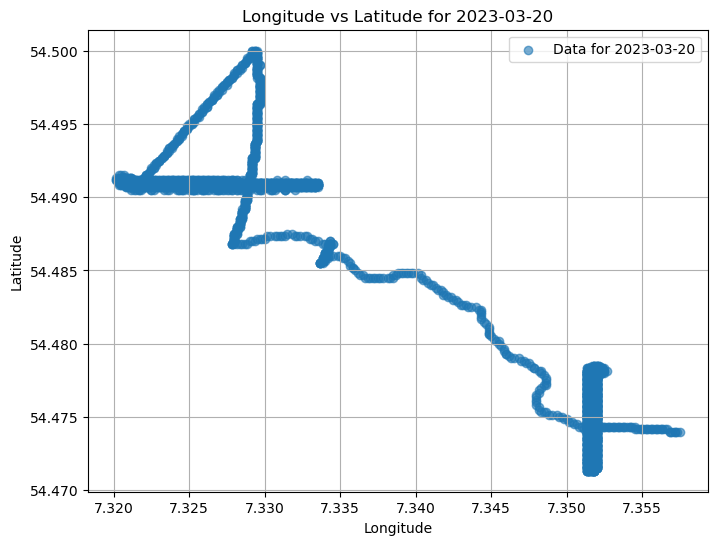

In [38]:
 # plot all lat lons
df['Date'] = df.index.date
grouped = df.groupby('Date')
 
for date, data in grouped:
    plt.figure(figsize=(8, 6))
    plt.scatter(data['Longitude'], data['Latitude'], label=f'Data for {date}', alpha=0.6)
    plt.title(f"Longitude vs Latitude for {date}")
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.legend()
    # plt.savefig(f"C:/Users/piago/Documents/Uni/5_Semester/Hiwi/Plots/grid_{date}.png")
    plt.show()


In [4]:
# extract dfs
df_2 = df.loc['2023-03-02']
df_2 = df_2[(df_2.index < '2023-03-02 09:48') | (df_2.index >= '2023-03-02 09:49')]

df_3 = df.loc['2023-03-03']

df_8 = df.loc['2023-03-08']

df_9 = df.loc['2023-03-09']
df_9.drop(df_9[df_9['CTD_Temp_SML']>6.2].index, inplace = True)

df_10 = df.loc['2023-03-10']

df_11 = df.loc['2023-03-11']

df_17 = df.loc['2023-03-17']
df_17 = df_17[df_17.index > '2023-03-17 08:03']

df_18 = df.loc['2023-03-18']
df_18 = df_18[df_18.index > '2023-03-18 07:50']

df_19 = df.loc['2023-03-19']

df_20 = df.loc['2023-03-20']




In [63]:
df = df_19


In [58]:
# plot ctd and air temp
# Filter columns that start with "CTD_Temp"
filtered_columns = [col for col in df.columns if col.startswith('CTD_Temp')]

# Create the plotly figure
fig = go.Figure()

for i, col in enumerate(filtered_columns):
    fig.add_trace(go.Scatter(
        x=df.index,
        y=df[col],
        mode='markers',
        marker = dict(size=8),
        name=col[-10:]
    ))

fig.add_trace(go.Scatter(
    x=df.index,
    y=df['Campbell_Air_Temperature'],
    mode='lines',
    #mode=mode,
    marker = dict(size=2),
    name='Campbell_Air'
))

# Customize the layout
fig.update_layout(
    title='Halobates Temperature',
    xaxis_title='Time',
    yaxis_title='Temperature',
    template='plotly_white',
    width=800,  # Set the width of the figure
    height=300,  # Set the height of the figure

    margin=dict(l=40, r=40, t=40, b=40)  # Customize margins
)


fig.show()

In [59]:
# RBR and air temp
filtered_columns = [col for col in df.columns if col.startswith('RBR_Temp')]

# Create the plotly figure
fig = go.Figure()

for i, col in enumerate(filtered_columns):
    fig.add_trace(go.Scatter(
        x=df.index,
        y=df[col],
        mode='markers',
        marker = {'size' : 8},
        name=col[-6:]
        
    ))

fig.add_trace(go.Scatter(
    x=df.index,
    y=df['Campbell_Air_Temperature'],
    mode='lines',
    #mode=mode,
    marker = dict(size=2),
    name='Campbell_Air'
))

# Customize the layout
fig.update_layout(
    title='Halobates Temperature RBR',
    xaxis_title='Time',
    yaxis_title='Temperature',
    template='plotly_white',
    width=800,  # Set the width of the figure
    height=300,  # Set the height of the figure

    margin=dict(l=40, r=40, t=40, b=40)  # Customize margins
)


fig.show()

In [64]:
# plot rbr, ctd and campbell temp

# check RBR temps
filtered_columns = [col for col in df.columns if col.startswith('RBR_Temp')]


# Create the plotly figure
fig = go.Figure()

for i, col in enumerate(filtered_columns):
    fig.add_trace(go.Scatter(
        x=df.index,
        y=df[col],
        mode='markers',
        marker = {'size' : 4,
                  'color' : 'red'},
        name='RBR'
        
    ))

filtered_columns = [col for col in df.columns if col.startswith('CTD_Temp')]

for i, col in enumerate(filtered_columns):
    fig.add_trace(go.Scatter(
        x=df.index,
        y=df[col],
        mode='markers',
        marker = {'size' : 4,
                  'color' : 'blue'},
        name='CTD'
        
    ))

fig.add_trace(go.Scatter(
    x=df.index,
    y=df['Campbell_Air_Temperature'],
    mode='lines',
    #mode=mode,
    marker = dict(size=2),
    name='Campbell_Air'
))

# Customize the layout
fig.update_layout(
    title='Halobates Temperature RBR, CTD, Campbell',
    xaxis_title='Time',
    yaxis_title='Temperature',
    template='plotly_white',
    width=800,  # Set the width of the figure
    height=300,  # Set the height of the figure

    margin=dict(l=40, r=40, t=40, b=40)  # Customize margins
)


fig.show()

In [56]:
#Detrend CTD, RBR and Campbell Air temp

# time in total seconds
df['time_numeric'] = (df.index - df.index.min()).total_seconds()  

# fit polynomial with numpy.polyfit:  quadratic
coefficients = np.polyfit(df['time_numeric'], df['CTD_Temp_SML'], 2) # fit polynomial
polynomial = np.poly1d(coefficients) #create function
df[f'fitted_2_Temp_SML'] = polynomial(df['time_numeric']) #values
df[f'detrend_2_Temp_SML'] = df['CTD_Temp_SML'] - df[f'fitted_2_Temp_SML']
df[f'detrend_2_Temp_SML'] = df[f'detrend_2_Temp_SML'] + df[f'fitted_2_Temp_SML'].median()

# same for all depths
depths = [30, 50, 60, 85, 100]

for d in depths:
    coefficients = np.polyfit(df['time_numeric'], df[f'CTD_Temperature_{d}cm_[°C]'], 2) # fit polynomial
    polynomial = np.poly1d(coefficients) #create function
    df[f'fitted_2_Temp_{d}'] = polynomial(df['time_numeric']) #values
    df[f'detrend_2_Temp_{d}'] = df[f'CTD_Temperature_{d}cm_[°C]'] - df[f'fitted_2_Temp_{d}']
    df[f'detrend_2_Temp_{d}'] = df[f'detrend_2_Temp_{d}'] + df[f'fitted_2_Temp_{d}'].median()


# ... and same for airtemp
coefficients = np.polyfit(df['time_numeric'], df['Campbell_Air_Temperature'], 2) # fit polynomial
polynomial = np.poly1d(coefficients) #create function
df[f'fitted_2_Temp_Air'] = polynomial(df['time_numeric']) #values
df[f'Air_detrend_2_Temp'] = df['Campbell_Air_Temperature'] - df[f'fitted_2_Temp_Air']
df[f'Air_detrend_2_Temp'] = df[f'Air_detrend_2_Temp'] + df[f'fitted_2_Temp_Air'].median()

# ... and for RBRs
depths = [30, 40, 50, 60, 85, 100]
for d in depths:
    coefficients = np.polyfit(df['time_numeric'], df[f'RBR_Temperature_{d}cm'], 2) # fit polynomial
    polynomial = np.poly1d(coefficients) #create function
    df[f'rbr_fitted_2_Temp_{d}'] = polynomial(df['time_numeric']) #values
    df[f'rbr_detrend_2_Temp_{d}'] = df[f'RBR_Temperature_{d}cm'] - df[f'rbr_fitted_2_Temp_{d}']
    df[f'rbr_detrend_2_Temp_{d}'] = df[f'rbr_detrend_2_Temp_{d}'] + df[f'rbr_fitted_2_Temp_{d}'].median()

In [57]:
# plot detrend CTD, RBR, air temp
# Filter columns that start with "detrend_Temp"
filtered_columns = [col for col in df.columns if col.startswith('detrend_2_Temp')]

# Create the plotly figure
fig = go.Figure()

for i, col in enumerate(filtered_columns):
    fig.add_trace(go.Scatter(
        x=df.index,
        y=df[col],
        mode='markers',
        marker = {'size' : 4,
                  'color' : 'blue'},
        name='CTD_detrend'
    ))


filtered_columns = [col for col in df.columns if col.startswith('rbr_detrend_2_Temp')]

for i, col in enumerate(filtered_columns):
    fig.add_trace(go.Scatter(
        x=df.index,
        y=df[col],
        mode='markers',
        marker = {'size' : 4,
                  'color' : 'red'},
        name='RBR_detrend' 
    ))

fig.add_trace(go.Scatter(
    x=df.index,
    y=df['Air_detrend_2_Temp'],
    mode='lines',
    marker = dict(size=8),
    name='Air_detrend'
))
# Customize the layout
fig.update_layout(
    title='Halobates Temperature detrended',
    xaxis_title='Time',
    yaxis_title='Temperature',
    template='plotly_white',
    width=800,  # Set the width of the figure
    height=300,  # Set the height of the figure

    margin=dict(l=40, r=40, t=40, b=40)  # Customize margins
)


fig.show()

In [54]:
# look at anomaly only
df['CTD_SML_noise'] = df['CTD_Temp_SML'] - df['CTD_Temp_SML'].mean()
df['CTD_30_noise'] = df['CTD_Temperature_30cm_[°C]'] - df['CTD_Temperature_30cm_[°C]'].mean()
df['RBR_30_noise'] = df['RBR_Temperature_30cm'] - df['RBR_Temperature_30cm'].mean()
df['Air_noise'] = df['Campbell_Air_Temperature'] - df['Campbell_Air_Temperature'].mean()

# for detrended: 
df['CTD_30_noise_d'] = df['detrend_2_Temp_30'] - df['detrend_2_Temp_30'].mean()
df['RBR_30_noise_d'] = df['rbr_detrend_2_Temp_30'] - df['rbr_detrend_2_Temp_30'].mean()
df['Air_noise_d'] = df['Air_detrend_2_Temp'] - df['Air_detrend_2_Temp'].mean()


KeyError: 'detrend_2_Temp_30'

In [8]:
# plot noise

# Create the plotly figure
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df.index,
    y=df['CTD_30_noise'],
    mode='markers',
    marker = {'size' : 4,
                'color' : 'blue'},
    name='CTD_30_noise'
))


fig.add_trace(go.Scatter(
    x=df.index,
    y=df['RBR_30_noise'],
    mode='markers',
    marker = {'size' : 4,
                'color' : 'red'},
    name='RBR_30_noise' 
))

fig.add_trace(go.Scatter(
    x=df.index,
    y=df['Air_noise'],
    mode='lines',
    marker = dict(size=8),
    name='Air_noise'
))
# Customize the layout
fig.update_layout(
    title='Halobates Temperature std',
    xaxis_title='Time',
    yaxis_title='Temperature std',
    template='plotly_white',
    width=800,  # Set the width of the figure
    height=300,  # Set the height of the figure

    margin=dict(l=40, r=40, t=40, b=40)  # Customize margins
)


fig.show()

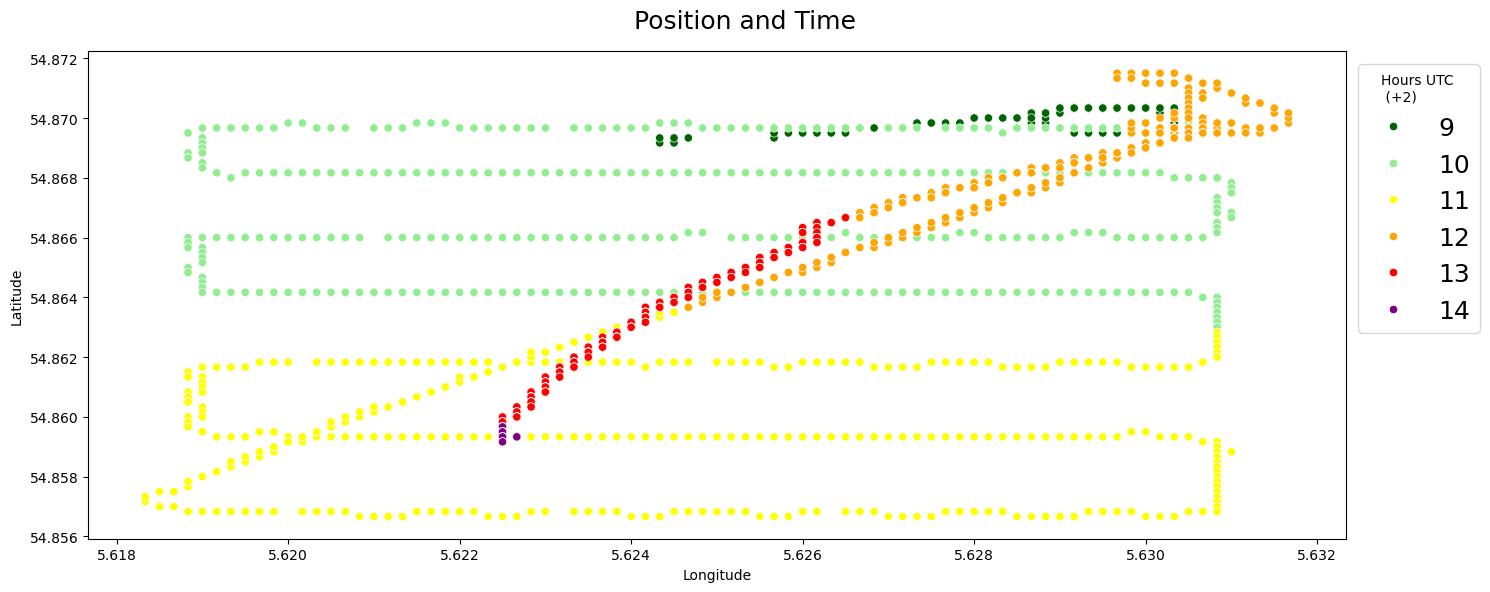

In [24]:
# grid with hours
# new column with only hour
df['hour_UTC'] = df.index.hour

colors1 = ['darkgreen', 'lightgreen', 'yellow', 'orange', 'red', 'purple', 'blue', 'lightblue']
fig, axs = plt.subplots(1, figsize = (15,6))
sns.scatterplot(data=df, x="Longitude", y="Latitude", hue="hour_UTC", palette=colors1)
plt.legend(bbox_to_anchor= (1,1), title = 'Hours UTC \n (+2)', fontsize = 18)


fig.suptitle('Position and Time', fontsize = 18)


plt.tight_layout()  # Adjusts subplots to fit in the figure area.
# plt.savefig('C:/Users/piago/Documents/Uni/5_Semester/Hiwi/Plots/20230318_Grid_Time.png')
plt.show()


In [ ]:
# for 9.3. only

df['hour_UTC'] = df.index.hour
df_first = df[df['time_numeric']<(df['time_numeric'].max())*0.5] # first run 
df_second = df[df['time_numeric']>=(df['time_numeric'].max())*0.5] # second run

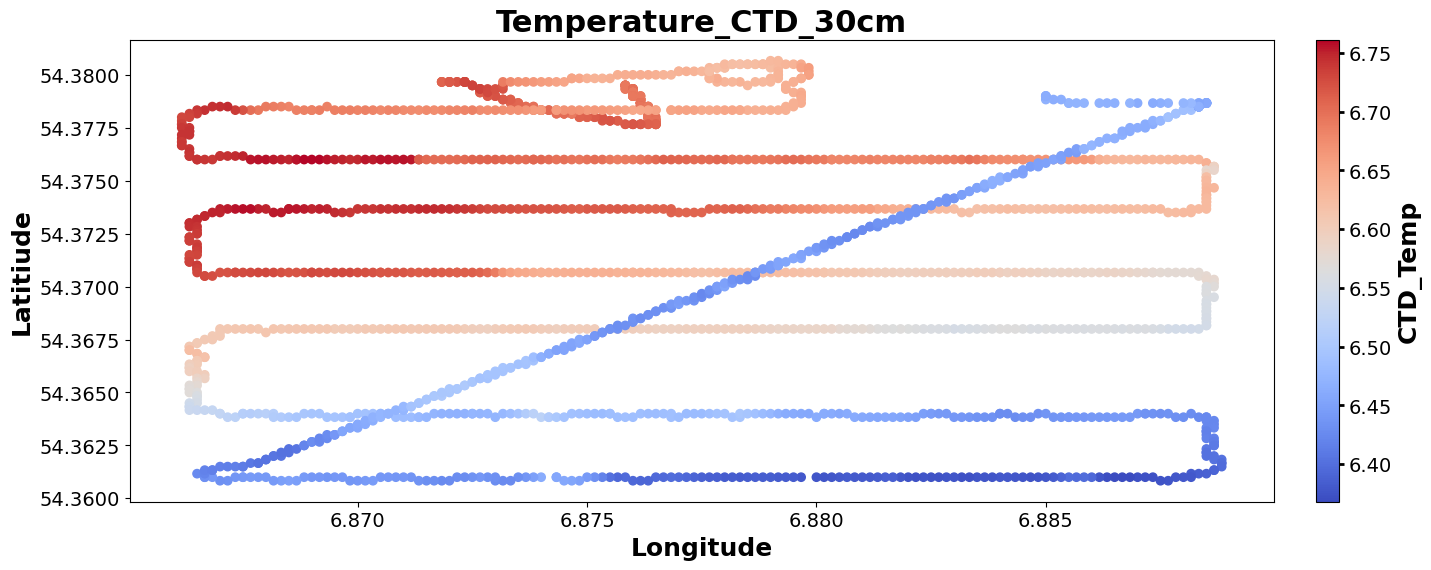

In [86]:
# spatial CTD
# df = df_second
fig,ax = plt.subplots(nrows=1, figsize=(18,6))#, sharex=True)  # sharey=True,
plt.scatter(df.Longitude,df.Latitude, c = df['CTD_Temperature_100cm_[°C]'], cmap = 'coolwarm', label = 'End_point')
cbar = plt.colorbar(cmap='coolwarm', pad=0.03)
cbar.set_label('CTD_Temp', fontsize=18, fontweight='bold')
cbar.ax.tick_params(axis='y', which='both', labelsize=14, width=2)  # Adjust length and width as desired

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Longitude", fontsize=18, fontweight='bold')
plt.ylabel("Latitiude", fontsize=18, fontweight='bold')
plt.title('Temperature_CTD_30cm',fontsize=22, fontweight='bold')
# plt.savefig('C:/Users/piago/Documents/Uni/5_Semester/Hiwi/Plots/20230302_30_spatial_CTD_detrend.png')
plt.show()

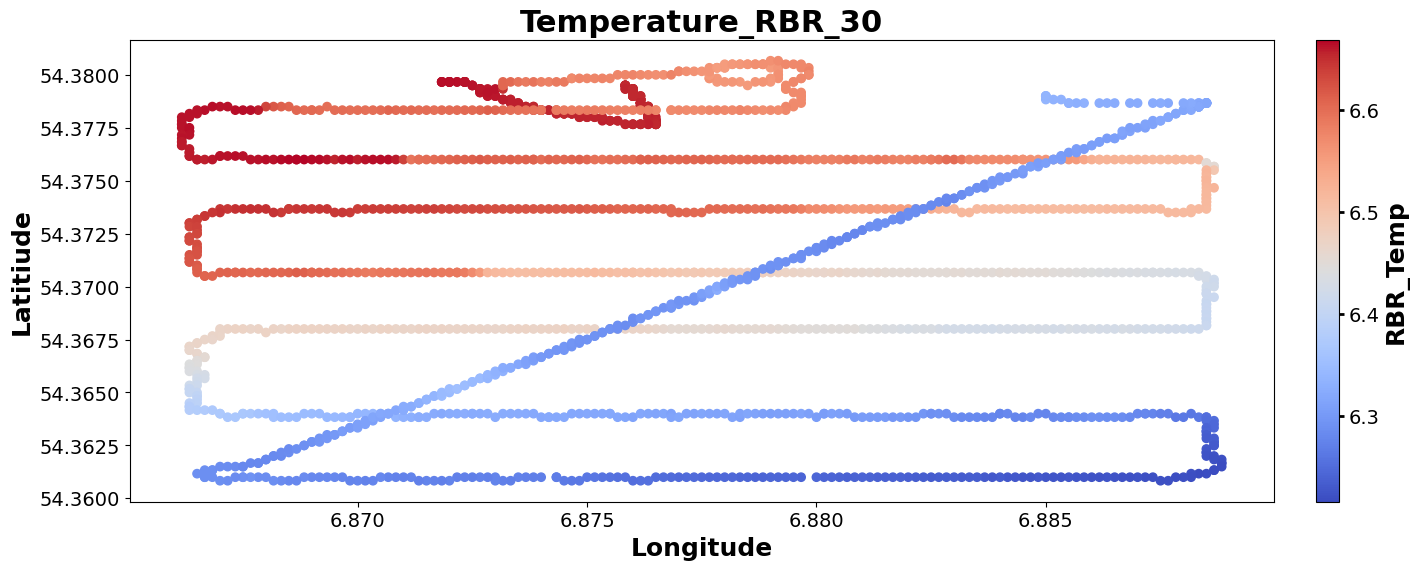

In [87]:
# spatial RBR

#df = df_first

fig,ax = plt.subplots(nrows=1, figsize=(18,6))#, sharex=True)  # sharey=True,
plt.scatter(df.Longitude,df.Latitude, c = df['RBR_Temperature_30cm'], cmap = 'coolwarm', label = 'End_point')
cbar = plt.colorbar(cmap='coolwarm', pad=0.03)
cbar.set_label('RBR_Temp', fontsize=18, fontweight='bold')
cbar.ax.tick_params(axis='y', which='both', labelsize=14, width=2)  # Adjust length and width as desired

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Longitude", fontsize=18, fontweight='bold')
plt.ylabel("Latitiude", fontsize=18, fontweight='bold')
plt.title('Temperature_RBR_30',fontsize=22, fontweight='bold')
# plt.savefig('C:/Users/piago/Documents/Uni/5_Semester/Hiwi/Plots/20230302_30_spatial_RBR_detrend.png')
plt.show()

In [ ]:
# check detrended RBR temps timeserires
filtered_columns = [col for col in df.columns if col.startswith('rbr_detrend')]

# Create the plotly figure
fig = go.Figure()

for i, col in enumerate(filtered_columns):
    fig.add_trace(go.Scatter(
        x=df.index,
        y=df[col],
        mode='markers',
        marker = dict(size=8),
        name=col[-6:]
    ))

# Customize the layout
fig.update_layout(
    title='Halobates Temperature RBR detrend',
    xaxis_title='Time',
    yaxis_title='Temperature',
    template='plotly_white',
    width=800,  # Set the width of the figure
    height=300,  # Set the height of the figure

    margin=dict(l=40, r=40, t=40, b=40)  # Customize margins
)


fig.show()

In [24]:
print(filtered_columns)

['CTD_Salinity_SML', 'CTD_Salinity_Absolute_SML', 'CTD_Salinity_30cm', 'CTD_Salinity_Absolute_30cm', 'CTD_Salinity_40cm', 'CTD_Salinity_Absolute_40cm', 'CTD_Salinity_practical_50cm_[ ]', 'CTD_Salinity_absolute_50cm_[g/kg]', 'CTD_Salinity_practical_60cm_[ ]', 'CTD_Salinity_absolute_60cm_[g/kg]', 'CTD_Salinity_85cm', 'CTD_Salinity_Absolute_85cm', 'CTD_Salinity_100cm', 'CTD_Salinity_Absolute_100cm']


In [29]:
# Filter columns that start with "Campbell_Windspeed"
filtered_columns = [col for col in df.columns if col.startswith('CTD_Salinity_Abs')]


# Create the plotly figure
fig = go.Figure()

for i, col in enumerate(filtered_columns):
    mode = 'lines+markers' if i % 2 == 0 else 'markers'
    fig.add_trace(go.Scatter(
        x=df.index,
        y=df[col],
        mode='lines',
        #mode=mode,
        marker = dict(size=2),
        name=col#[-12:-6]
    ))


# Customize the layout
fig.update_layout(
    title='Absolute Salinity',
    xaxis_title='Time',
    yaxis_title='abs_salinity',
    #legend_title='Legend',
    template='plotly_white',
    width=800,  # Set the width of the figure
    height=300,  # Set the height of the figure
    legend=dict(
        #x=0.02,  # Set the x position of the legend
        #y=0.98,  # Set the y position of the legend
        traceorder='normal',
        font=dict(
            family='sans-serif',
            size=8,
            color='black'
        ),
        #bgcolor='LightSteelBlue',
        #bordercolor='Black',
        #borderwidth=1
    ),
    margin=dict(l=40, r=40, t=40, b=40)  # Customize margins
)


# Set x and y axis limits
fig.update_xaxes(range=[df.index.min(), df.index.max()],
                title_font=dict(size=18, family='Arial Black, sans-serif', color='black'),
                tickfont=dict(size=14) 
) #ncrease y-axis tick font size# Adjust as needed

#fig.update_yaxes(range=[df[filtered_columns].min().min(), df[filtered_columns].max().max()])  # Adjust as needed
fig.update_yaxes(#range=[17,18.5],
                title_font=dict(size=18, family='Arial Black, sans-serif', color='black'),
                tickfont=dict(size=14)  # Increase y-axis tick font size
)  # Adjust as needed


# Show the plot
fig.show()

In [ ]:
# plot direction
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.scatterplot(data=df, x="Longitude", y="Latitude", hue="Direction")

plt.xlabel('Longitude', fontsize = 18)
plt.ylabel('Latitude', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 18, bbox_to_anchor=(1.0, 1))
plt.tight_layout()

#plt.savefig('C:/Users/piago/Documents/Uni/5_Semester/Hiwi/Plots/20230309_Grid_directions.png')

In [39]:
df['Date'] = df['Date'].to_numpy()

<Axes: xlabel='Longitude', ylabel='Latitude'>

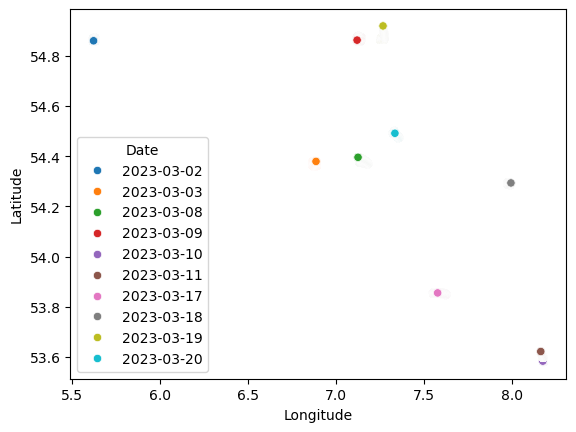

In [42]:
sns.scatterplot(data=df, x="Longitude", y="Latitude", hue="Date")

In [ ]:
os.chdir('code')

In [ ]:
!jupyter nbconvert --to html check_zigzag_missions.ipynb --no-input --output "20230303.html"